In [15]:
# Imports
import pandas, re
from nltk.tokenize import WhitespaceTokenizer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Common stopword list
common_stop = re.split('\s+', open('./throughputs/stopwords.txt', 'r').read().lower())

# Configure the NLTK tokenizer
tokenizer = WhitespaceTokenizer()

# Jupyter magic
%matplotlib inline

# In case it's needed:
def string_test(s):
    """Use: strings = [ string_test(text) for text in texts ]"""
    if s is None:
        return ''
    else:
        return str(s)

def tokenized(a_list):
    """ Tokenizes a list of strings
        Returns a list of word lists (cleaned and stopped)
    """
    tokenized = []
    for item in a_list:
        raw = re.sub(r"[^\w\d'\s]+",'', item).lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [word for word in tokens if not word in stopwords]
        tokenized.append(stopped_tokens)
        return tokenized

In [18]:
# Revised stopword list
local_stop = [ 'goldreply', 'points', 'permalinkembedsaveparentreportgive', 
              'permalinkembedsavereportgive' ]
all_stop = common_stop + local_stop

In [5]:
# Load the CSV as a dataframe
colnames = ['Title' , 'Date', 'Author', 'Origin', 'URL', 'Text']
df = pandas.read_csv('./throughputs/clowns_3.csv', names=colnames)

## News Reports versus Social Media Posts

In [6]:
# Create seperate lists of news texts and social media texts
news = [ string_test(i) for i in df[df["Origin"] == "News Report"].Text.tolist() ]
social = [ string_test(i) for i in df[df["Origin"] == "Social Media"].Text.tolist() ]

In [9]:
print(f'There are {len(news)} news posts and {len(social)} social media posts.')

There are 162 news posts and 18 social media posts.


In [26]:
# Create a list of tokenized texts (which are in fact lists)
social_tokens = tokenized(social)
news_tokens = tokenized(news)

## Frequencies Visualized

In [33]:
# Jam all the words into one string for the word cloud module
# AKA double-stringification
social_words = ' '.join([' '.join(item) for item in social_tokens])
news_words = ' '.join([' '.join(item) for item in news_tokens])

In [29]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=5000, 
                      contour_width=3,
                      width=1800, 
                      height=900,
                      contour_color='steelblue')

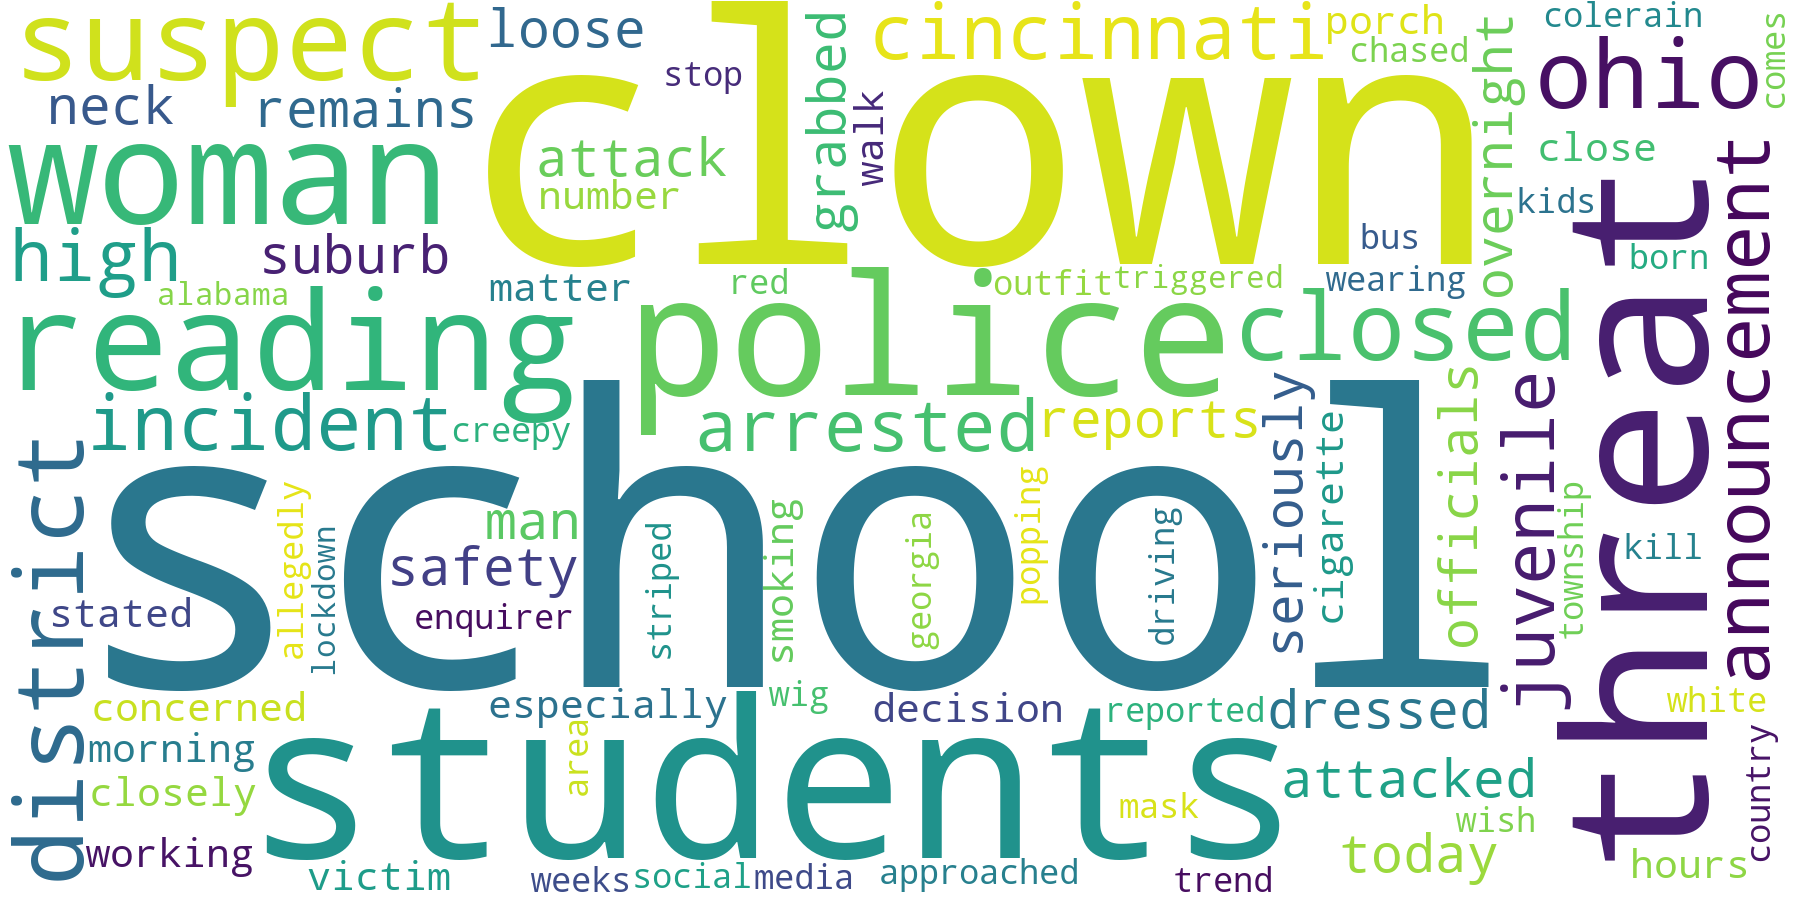

In [35]:
# Generate a word cloud
wordcloud.generate(news_words)

# Visualize the word cloud
wordcloud.to_image()

Do the news again for the months of September and October to see if the shift in school turns up.

In [38]:
dates = df.Date.tolist()
print(dates[0:20])

['Date', 'September 30 2016', 'September 6 2016', 'September 13 2016', 'October 13 2016', 'October 13 2014', 'October 30 2016', 'October 17 2016', 'September 29 2016', 'September 24 2016', 'September 19 2016', 'September 22 2016', 'September 19 2016', 'September 20 2016', 'August 31 2016', 'September 5 2016', 'September 5 2016', 'September 5 2016', 'September 2 2016', 'August 29 2016']


In [46]:
september = df[df['Date'].str.contains("September")]
october   = df[df['Date'].str.contains("October")]

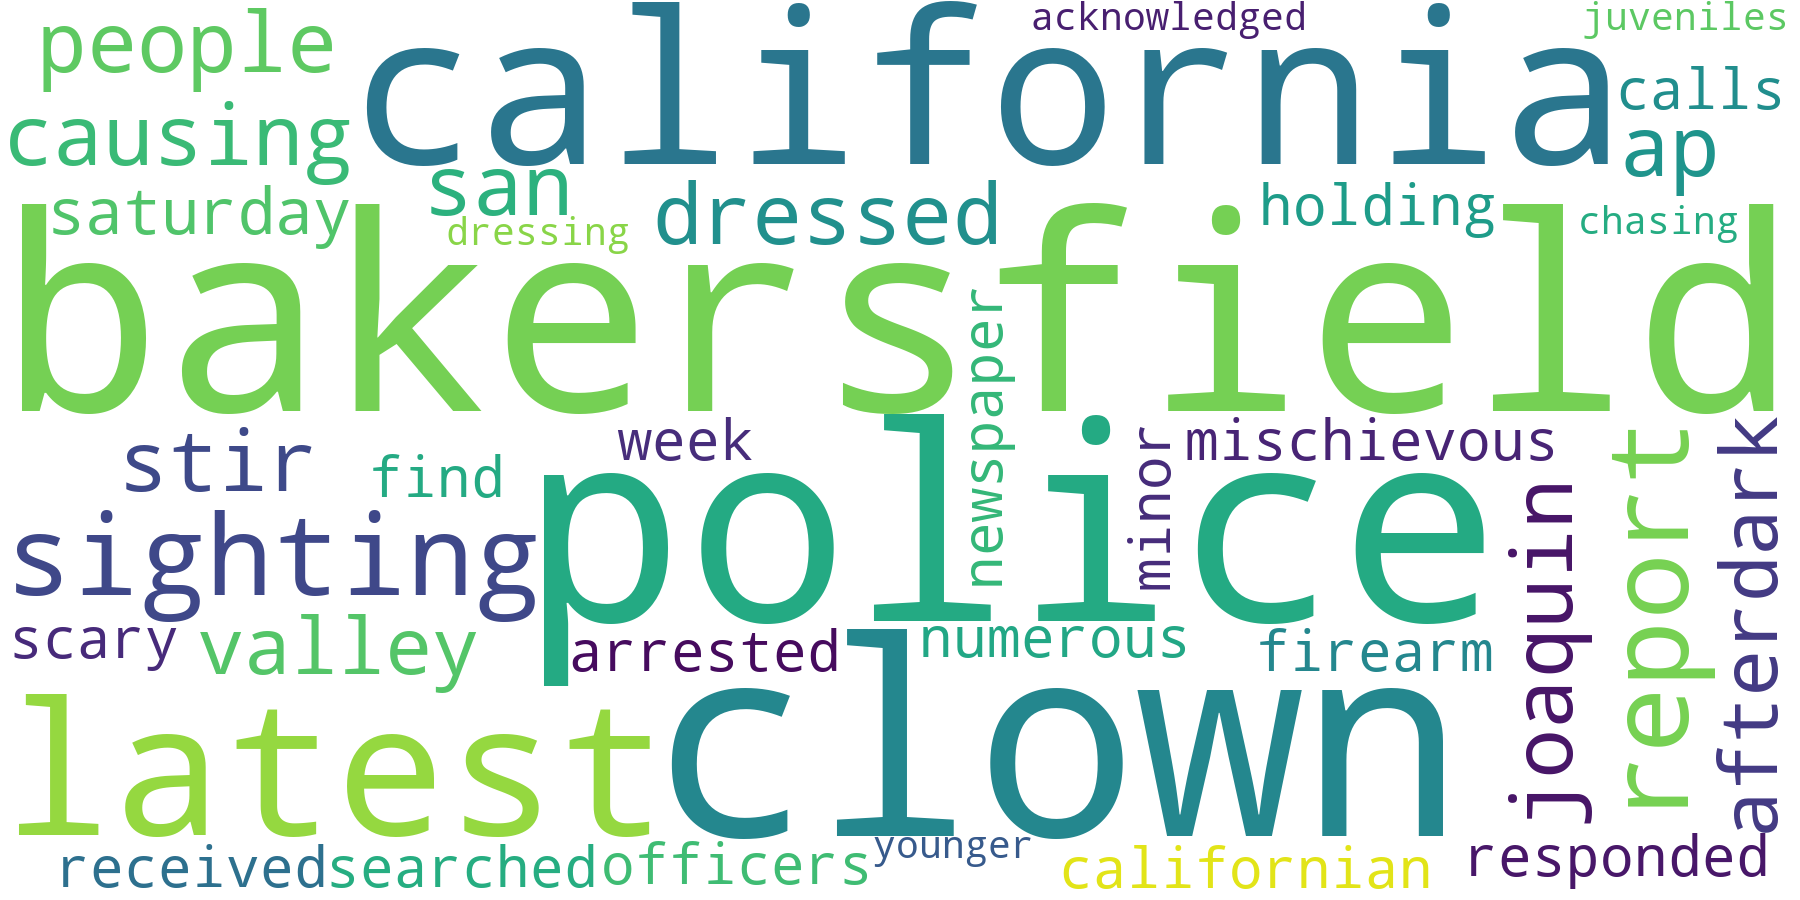

In [49]:
month = october
news = [ string_test(i) for i in month[month["Origin"] == "News Report"].Text.tolist() ]
tokens = tokenized(news)
words = ' '.join([' '.join(item) for item in tokens])
wordcloud.generate(words)
wordcloud.to_image()